Name : Vijay Kamble<br>
Roll num : 232010021
    
  # **Task 1 :** Data Engineering and Analytics of Aviation data

1) Loading the data

In [ ]:
import pandas as pd

# Load the dataset
file_path='/content/drive/MyDrive/Akasa task 1/aviation_data.csv'
data = pd.read_csv(file_path)

# basic info
data_info = data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FlightNumber   12 non-null     object 
 1   DepartureDate  12 non-null     object 
 2   DepartureTime  12 non-null     object 
 3   ArrivalDate    12 non-null     object 
 4   ArrivalTime    12 non-null     object 
 5   Airline        12 non-null     object 
 6   DelayMinutes   10 non-null     float64
dtypes: float64(1), object(6)
memory usage: 800.0+ bytes


,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,NaN
5,UA9101,09/02/2023,05:00 PM,09/02/2023,07:15 PM,United Airlines,20.0
6,AA1234,09/02/2023,08:30 PM,09/03/2023,10:45 AM,American Airlines,60.0
7,DL5678,09/03/2023,01:00 PM,09/03/2023,03:30 PM,Delta,10.0
8,UA9101,09/03/2023,03:00 PM,09/03/2023,05:20 PM,United Airlines,NaN
9,AA1234,09/03/2023,08:30 AM,09/03/2023,10:00 AM,American Airlines,15.0


### **Data Cleaning and Normalization**

In [ ]:

# Converting the date cols to yyyy-mm-dd
data['DepartureDate'] = pd.to_datetime(data['DepartureDate'], format='%m/%d/%Y')
data['ArrivalDate'] = pd.to_datetime(data['ArrivalDate'], format='%m/%d/%Y')

# Converting time cols to 24-hr
data['DepartureTime'] = pd.to_datetime(data['DepartureTime'], format='%I:%M %p').dt.time
data['ArrivalTime'] = pd.to_datetime(data['ArrivalTime'], format='%I:%M %p').dt.time

data['DelayMinutes'].fillna(data['DelayMinutes'].mean(), inplace=True)

data_cleaned = data.drop_duplicates(subset=['FlightNumber', 'DepartureDate', 'DepartureTime'])

print(data_cleaned)


   FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0        AA1234    2023-09-01      08:30:00  2023-09-01    10:45:00   
1        DL5678    2023-09-01      13:15:00  2023-09-01    15:30:00   
2        UA9101    2023-09-01      17:00:00  2023-09-01    19:15:00   
4        DL5678    2023-09-02      14:00:00  2023-09-02    16:10:00   
5        UA9101    2023-09-02      17:00:00  2023-09-02    19:15:00   
6        AA1234    2023-09-02      20:30:00  2023-09-03    10:45:00   
7        DL5678    2023-09-03      13:00:00  2023-09-03    15:30:00   
8        UA9101    2023-09-03      15:00:00  2023-09-03    17:20:00   
9        AA1234    2023-09-03      08:30:00  2023-09-03    10:00:00   
10       DL5678    2023-09-04      12:30:00  2023-09-04    14:40:00   
11       UA9101    2023-09-04      19:00:00  2023-09-04    21:15:00   

              Airline  DelayMinutes  
0   American Airlines          15.0  
1               Delta           5.0  
2     United Airlines          25

### **Handling Inconsisten Data**

here we have swapped the column values which might have  inconsistent data where , arrival time < departure time. So we swap them to make sure **Departure time is earlier and arrival time is later**.

In [ ]:
condition = data_cleaned['ArrivalTime'] < data_cleaned['DepartureTime']

data_cleaned.loc[condition, ['ArrivalTime', 'DepartureTime']] = data_cleaned.loc[condition, ['DepartureTime', 'ArrivalTime']].values

print(data_cleaned)

   FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0        AA1234    2023-09-01      08:30:00  2023-09-01    10:45:00   
1        DL5678    2023-09-01      13:15:00  2023-09-01    15:30:00   
2        UA9101    2023-09-01      17:00:00  2023-09-01    19:15:00   
4        DL5678    2023-09-02      14:00:00  2023-09-02    16:10:00   
5        UA9101    2023-09-02      17:00:00  2023-09-02    19:15:00   
6        AA1234    2023-09-02      10:45:00  2023-09-03    20:30:00   
7        DL5678    2023-09-03      13:00:00  2023-09-03    15:30:00   
8        UA9101    2023-09-03      15:00:00  2023-09-03    17:20:00   
9        AA1234    2023-09-03      08:30:00  2023-09-03    10:00:00   
10       DL5678    2023-09-04      12:30:00  2023-09-04    14:40:00   
11       UA9101    2023-09-04      19:00:00  2023-09-04    21:15:00   

              Airline  DelayMinutes  
0   American Airlines          15.0  
1               Delta           5.0  
2     United Airlines          25

In [ ]:
# create copy of cleaned data
df = pd.DataFrame(data_cleaned)

# combining cols to get dateTime object
df['DepartureDateTime'] = df.apply(lambda row: pd.Timestamp.combine(row['DepartureDate'], row['DepartureTime']), axis=1)
df['ArrivalDateTime'] = df.apply(lambda row: pd.Timestamp.combine(row['ArrivalDate'], row['ArrivalTime']), axis=1)

# flight duration  (minutes)
df['FlightDuration'] = (df['ArrivalDateTime'] - df['DepartureDateTime']).dt.total_seconds() / 60

df = df.drop(columns=['DepartureDateTime', 'ArrivalDateTime'])

print(df)

   FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0        AA1234    2023-09-01      08:30:00  2023-09-01    10:45:00   
1        DL5678    2023-09-01      13:15:00  2023-09-01    15:30:00   
2        UA9101    2023-09-01      17:00:00  2023-09-01    19:15:00   
4        DL5678    2023-09-02      14:00:00  2023-09-02    16:10:00   
5        UA9101    2023-09-02      17:00:00  2023-09-02    19:15:00   
6        AA1234    2023-09-02      10:45:00  2023-09-03    20:30:00   
7        DL5678    2023-09-03      13:00:00  2023-09-03    15:30:00   
8        UA9101    2023-09-03      15:00:00  2023-09-03    17:20:00   
9        AA1234    2023-09-03      08:30:00  2023-09-03    10:00:00   
10       DL5678    2023-09-04      12:30:00  2023-09-04    14:40:00   
11       UA9101    2023-09-04      19:00:00  2023-09-04    21:15:00   

              Airline  DelayMinutes  FlightDuration  
0   American Airlines          15.0           135.0  
1               Delta           5.0    

## **Data Analysis and Visualisation**

### a)	Analyze the distribution of delays and identify any trends or patterns.

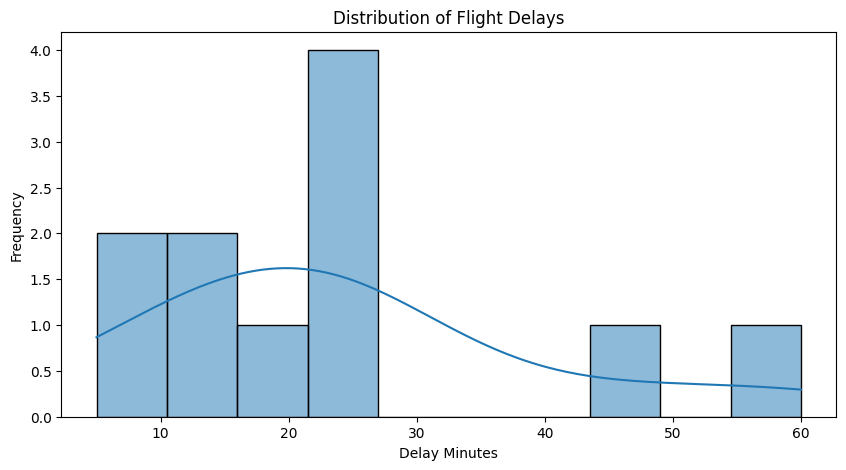

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of delays
plt.figure(figsize=(10, 5))
sns.histplot(df['DelayMinutes'], bins=10, kde=True)
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')
plt.show()

## From the observations we can depict these observations that :

### a) Most frequent delays are in the range of 202-25 minutes<br>
### b) Most of the flights are delayed upto 25 minutes only showing flights are more likely to be delayed in this range only

### c) Only these 2 flights  are delayed over 25 minutes for these schedule

In [ ]:
delayed_flights = df[df['DelayMinutes'] > 25]
delayed_flights

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,FlightDuration
6,AA1234,2023-09-02,10:45:00,2023-09-03,20:30:00,American Airlines,60.0,2025.0
11,UA9101,2023-09-04,19:00:00,2023-09-04,21:15:00,United Airlines,45.0,135.0


## 2) Calculate the average delay for each airline.

In [ ]:
average_delay = df.groupby('Airline')['DelayMinutes'].mean()
print("average delay of each flights in minutes : ",average_delay)

average delay of each flights in minutes :  Airline
American Airlines    30.00
Delta                16.25
United Airlines      28.75
Name: DelayMinutes, dtype: float64


From the above observation we can say **Delta** has the minimum amount of delayed time(minutes) as compared to other airlines whereas **American Airlines** have taken the most among the given dataset of airplanes